In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import bs4
import requests
from io import StringIO

In [6]:
# In this case the table is commented out
# fetch the web page content
response = requests.get('https://fbref.com/en/comps/61/stats/Primera-Division-Stats')
soup = bs4.BeautifulSoup(response.content, 'html.parser')

# find all comments
comments = soup.find_all(string=lambda text:isinstance(text, bs4.Comment))
commented_out_tables = [bs4.BeautifulSoup(cmt, 'html.parser').find_all('table') for cmt in comments]

# filter to keep only single tables
commented_out_tables = [tab[0] for tab in commented_out_tables if len(tab) == 1]

# convert the table to a DF
df_liga_par = pd.read_html(StringIO(str(commented_out_tables[0])))[0]

/tmp/ipykernel_4323/3705642280.py:8: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  commented_out_tables = [bs4.BeautifulSoup(cmt, 'html.parser').find_all('table') for cmt in comments]


In [8]:
df_liga_par.head()

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Unnamed: 3_level_0  \
                  Rk             Player             Nation                Pos   
0                  1     Nelson Acevedo             ar ARG                 MF   
1                  2       Diego Acosta             py PAR                 FW   
2                  3     Marcelo Acosta             py PAR                 MF   
3                  4   Milciades Adorno             py PAR                 FW   
4                  5   Milciades Adorno             py PAR              FW,MF   

  Unnamed: 4_level_0 Unnamed: 5_level_0 Unnamed: 6_level_0 Playing Time  \
               Squad                Age               Born           MP   
0            Tacuary                 35               1988           17   
1      Sport Luqueño                 21               2002            6   
2     Sol de América                 23               2000           27   
3            Guaraní                 19               2005            1   
4  Sportivo Ameliano                 19               2005            6   

                ... Performance                 Per 90 Minutes              \
  Starts   Min  ...          PK PKatt CrdY CrdR            Gls   Ast   G+A   
0      8   739  ...           0     0    2    0           0.00  0.00  0.00   
1      3   255  ...           0     0    0    0           0.35  0.35  0.71   
2     13  1108  ...           0     0    2    2           0.08  0.16  0.24   
3      1    54  ...           0     0    0    0           0.00  0.00  0.00   
4      6   301  ...           0     0    2    0           0.30  0.00  0.30   

               Unnamed: 24_level_0  
   G-PK G+A-PK             Matches  
0  0.00   0.00             Matches  
1  0.35   0.71             Matches  
2  0.08   0.24             Matches  
3  0.00   0.00             Matches  
4  0.30   0.30             Matches  

[5 rows x 25 columns]

In [9]:
# check number of rows
df_liga_par.shape

(531, 25)

In [7]:
# get full columns
df_liga_par.columns.values

array(['Unnamed: 0_level_0_Rk', 'Unnamed: 1_level_0_Player',
       'Unnamed: 2_level_0_Nation', 'Unnamed: 3_level_0_Pos',
       'Unnamed: 4_level_0_Squad', 'Unnamed: 5_level_0_Age',
       'Unnamed: 6_level_0_Born', 'Playing Time_MP',
       'Playing Time_Starts', 'Playing Time_Min', 'Playing Time_90s',
       'Performance_Gls', 'Performance_Ast', 'Performance_G+A',
       'Performance_G-PK', 'Performance_PK', 'Performance_PKatt',
       'Performance_CrdY', 'Performance_CrdR', 'Per 90 Minutes_Gls',
       'Per 90 Minutes_Ast', 'Per 90 Minutes_G+A', 'Per 90 Minutes_G-PK',
       'Per 90 Minutes_G+A-PK', 'Unnamed: 24_level_0_Matches'],
      dtype=object)

In [10]:
# join columns
df_liga_par.columns = ['_'.join(col).strip() for col in df_liga_par.columns.values]
df_liga_par.head()

,Unnamed: 0_level_0_Rk,Unnamed: 1_level_0_Player,Unnamed: 2_level_0_Nation,Unnamed: 3_level_0_Pos,Unnamed: 4_level_0_Squad,Unnamed: 5_level_0_Age,Unnamed: 6_level_0_Born,Playing Time_MP,Playing Time_Starts,Playing Time_Min,...,Performance_PK,Performance_PKatt,Performance_CrdY,Performance_CrdR,Per 90 Minutes_Gls,Per 90 Minutes_Ast,Per 90 Minutes_G+A,Per 90 Minutes_G-PK,Per 90 Minutes_G+A-PK,Unnamed: 24_level_0_Matches
0,1,Nelson Acevedo,ar ARG,MF,Tacuary,35,1988,17,8,739,...,0,0,2,0,0.00,0.00,0.00,0.00,0.00,Matches
1,2,Diego Acosta,py PAR,FW,Sport Luqueño,21,2002,6,3,255,...,0,0,0,0,0.35,0.35,0.71,0.35,0.71,Matches
2,3,Marcelo Acosta,py PAR,MF,Sol de América,23,2000,27,13,1108,...,0,0,2,2,0.08,0.16,0.24,0.08,0.24,Matches
3,4,Milciades Adorno,py PAR,FW,Guaraní,19,2005,1,1,54,...,0,0,0,0,0.00,0.00,0.00,0.00,0.00,Matches
4,5,Milciades Adorno,py PAR,"FW,MF",Sportivo Ameliano,19,2005,6,6,301,...,0,0,2,0,0.30,0.00,0.30,0.30,0.30,Matches


In [11]:
# delete columns reassigning to the DF
df_liga_par = df_liga_par.drop(['Unnamed: 0_level_0_Rk', 'Unnamed: 24_level_0_Matches'], axis=1)

In [12]:
df_liga_par.columns.values

array(['Unnamed: 1_level_0_Player', 'Unnamed: 2_level_0_Nation',
       'Unnamed: 3_level_0_Pos', 'Unnamed: 4_level_0_Squad',
       'Unnamed: 5_level_0_Age', 'Unnamed: 6_level_0_Born',
       'Playing Time_MP', 'Playing Time_Starts', 'Playing Time_Min',
       'Playing Time_90s', 'Performance_Gls', 'Performance_Ast',
       'Performance_G+A', 'Performance_G-PK', 'Performance_PK',
       'Performance_PKatt', 'Performance_CrdY', 'Performance_CrdR',
       'Per 90 Minutes_Gls', 'Per 90 Minutes_Ast', 'Per 90 Minutes_G+A',
       'Per 90 Minutes_G-PK', 'Per 90 Minutes_G+A-PK'], dtype=object)

In [13]:
# rename columns labels
df_liga_par.columns = ['player', 'nation', 'pos', 'squad', 'age', 'born', 'mp', 'starts', 'min', '90s', 'goals', 'ast', 'g+a', 'g-pk', 'pk', 'pkatt', 'crdy', 'crdr', 'per_gls', 'per_ast', 'per_g+a', 'per_g-pk', 'per_g+a-pk']

In [14]:
df_liga_par.head()

,player,nation,pos,squad,age,born,mp,starts,min,90s,...,g-pk,pk,pkatt,crdy,crdr,per_gls,per_ast,per_g+a,per_g-pk,per_g+a-pk
0,Nelson Acevedo,ar ARG,MF,Tacuary,35,1988,17,8,739,8.2,...,0,0,0,2,0,0.00,0.00,0.00,0.00,0.00
1,Diego Acosta,py PAR,FW,Sport Luqueño,21,2002,6,3,255,2.8,...,1,0,0,0,0,0.35,0.35,0.71,0.35,0.71
2,Marcelo Acosta,py PAR,MF,Sol de América,23,2000,27,13,1108,12.3,...,1,0,0,2,2,0.08,0.16,0.24,0.08,0.24
3,Milciades Adorno,py PAR,FW,Guaraní,19,2005,1,1,54,0.6,...,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00
4,Milciades Adorno,py PAR,"FW,MF",Sportivo Ameliano,19,2005,6,6,301,3.3,...,1,0,0,2,0,0.30,0.00,0.30,0.30,0.30


Delete inconsistent rows

In [15]:
df_liga_par = df_liga_par[df_liga_par['player'] != 'Player']

In [16]:
# save CSV

df_liga_par.to_csv('/home/axel/Code/Python/axel/football_analysis/csv/liga_par.csv', index=False)

Read CSV

In [2]:
df_liga_par = pd.read_csv('/home/axel/Code/Python/axel/football_analysis/csv/liga_par.csv')
df_liga_par.head()

,player,nation,pos,squad,age,born,mp,starts,min,90s,...,g-pk,pk,pkatt,crdy,crdr,per_gls,per_ast,per_g+a,per_g-pk,per_g+a-pk
0,Nelson Acevedo,ar ARG,MF,Tacuary,35.0,1988.0,17,8,739,8.2,...,0,0,0,2,0,0.00,0.00,0.00,0.00,0.00
1,Diego Acosta,py PAR,FW,Sport Luqueño,21.0,2002.0,6,3,255,2.8,...,1,0,0,0,0,0.35,0.35,0.71,0.35,0.71
2,Marcelo Acosta,py PAR,MF,Sol de América,23.0,2000.0,27,13,1108,12.3,...,1,0,0,2,2,0.08,0.16,0.24,0.08,0.24
3,Milciades Adorno,py PAR,FW,Guaraní,19.0,2005.0,1,1,54,0.6,...,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00
4,Milciades Adorno,py PAR,"FW,MF",Sportivo Ameliano,19.0,2005.0,6,6,301,3.3,...,1,0,0,2,0,0.30,0.00,0.30,0.30,0.30


In [3]:
df_copy_par = df_liga_par.copy()
df_copy_par.head()

,player,nation,pos,squad,age,born,mp,starts,min,90s,...,g-pk,pk,pkatt,crdy,crdr,per_gls,per_ast,per_g+a,per_g-pk,per_g+a-pk
0,Nelson Acevedo,ar ARG,MF,Tacuary,35.0,1988.0,17,8,739,8.2,...,0,0,0,2,0,0.00,0.00,0.00,0.00,0.00
1,Diego Acosta,py PAR,FW,Sport Luqueño,21.0,2002.0,6,3,255,2.8,...,1,0,0,0,0,0.35,0.35,0.71,0.35,0.71
2,Marcelo Acosta,py PAR,MF,Sol de América,23.0,2000.0,27,13,1108,12.3,...,1,0,0,2,2,0.08,0.16,0.24,0.08,0.24
3,Milciades Adorno,py PAR,FW,Guaraní,19.0,2005.0,1,1,54,0.6,...,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00
4,Milciades Adorno,py PAR,"FW,MF",Sportivo Ameliano,19.0,2005.0,6,6,301,3.3,...,1,0,0,2,0,0.30,0.00,0.30,0.30,0.30


In [20]:
df_copy_par.shape

(511, 23)

In [21]:
df_copy_par.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   player      511 non-null    object 
 1   nation      478 non-null    object 
 2   pos         498 non-null    object 
 3   squad       511 non-null    object 
 4   age         478 non-null    float64
 5   born        478 non-null    float64
 6   mp          511 non-null    int64  
 7   starts      511 non-null    int64  
 8   min         511 non-null    int64  
 9   90s         511 non-null    float64
 10  goals       511 non-null    int64  
 11  ast         511 non-null    int64  
 12  g+a         511 non-null    int64  
 13  g-pk        511 non-null    int64  
 14  pk          511 non-null    int64  
 15  pkatt       511 non-null    int64  
 16  crdy        511 non-null    int64  
 17  crdr        511 non-null    int64  
 18  per_gls     511 non-null    float64
 19  per_ast     511 non-null    f

In [22]:
# NULL values

df_copy_par.isnull().sum()

player         0
nation        33
pos           13
squad          0
age           33
born          33
mp             0
starts         0
min            0
90s            0
goals          0
ast            0
g+a            0
g-pk           0
pk             0
pkatt          0
crdy           0
crdr           0
per_gls        0
per_ast        0
per_g+a        0
per_g-pk       0
per_g+a-pk     0
dtype: int64

In [23]:
# check NULL values for all columns

# Count null values in each column
null_counts = df_copy_par.isnull().sum()

# Print the result column by column
for column, count in null_counts.items():
    print(f"Column '{column}' has {count} null values.")

Column 'player' has 0 null values.
Column 'nation' has 33 null values.
Column 'pos' has 13 null values.
Column 'squad' has 0 null values.
Column 'age' has 33 null values.
Column 'born' has 33 null values.
Column 'mp' has 0 null values.
Column 'starts' has 0 null values.
Column 'min' has 0 null values.
Column '90s' has 0 null values.
Column 'goals' has 0 null values.
Column 'ast' has 0 null values.
Column 'g+a' has 0 null values.
Column 'g-pk' has 0 null values.
Column 'pk' has 0 null values.
Column 'pkatt' has 0 null values.
Column 'crdy' has 0 null values.
Column 'crdr' has 0 null values.
Column 'per_gls' has 0 null values.
Column 'per_ast' has 0 null values.
Column 'per_g+a' has 0 null values.
Column 'per_g-pk' has 0 null values.
Column 'per_g+a-pk' has 0 null values.


In [24]:
# check by specific columns NULL values

column_name = 'goals'

null_count = df_copy_par[column_name].isnull().sum()

print(f"Column '{column_name}' has {null_count} null values.")

Column 'goals' has 0 null values.


In [29]:
# convert 'goals' column to int type

df_copy_par['born'] = df_copy_par['born'].astype(int)

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [31]:
df_copy['ast'] = df_copy['ast'].astype(int)

/tmp/ipykernel_3218/1177074042.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['ast'] = df_copy['ast'].astype(int)


Sort df by goals

In [25]:
df_filter_goals = df_copy_par.sort_values(by=['goals'], ascending=False)
df_filter_goals.head()

,player,nation,pos,squad,age,born,mp,starts,min,90s,...,g-pk,pk,pkatt,crdy,crdr,per_gls,per_ast,per_g+a,per_g-pk,per_g+a-pk
51,Wilson Ayala,py PAR,MF,2 de Mayo,28.0,1995.0,37,22,1908,21.2,...,9,3,3,4,1,0.57,0.24,0.80,0.42,0.66
114,Lisandro Cabrera,ar ARG,FW,Sol de América,26.0,1998.0,39,30,2492,27.7,...,11,0,0,8,1,0.40,0.11,0.51,0.40,0.51
207,Fernando Fernández,py PAR,FW,Cerro Porteño,32.0,1992.0,33,16,1544,17.2,...,11,0,0,3,0,0.64,0.00,0.64,0.64,0.64
179,Cecilio Domínguez,py PAR,"MF,FW",Cerro Porteño,29.0,1994.0,25,21,1707,19.0,...,8,3,3,2,0,0.58,0.26,0.84,0.42,0.69
13,Adrián Alcaraz,py PAR,"FW,MF",Guaraní,24.0,1999.0,34,33,2812,31.2,...,10,0,0,4,1,0.32,0.06,0.38,0.32,0.38


Filter by age and goals

In [4]:
#filter df by goals and age

df_filter_goals = df_copy_par[(df_copy_par['goals'] >= 5) & (df_copy_par['age'] >= 22) & (df_copy_par['age'] <= 32)].reset_index(drop=True)

In [5]:
df_filter_goals.shape

(31, 23)

Bar chart


In [6]:
import numpy as np

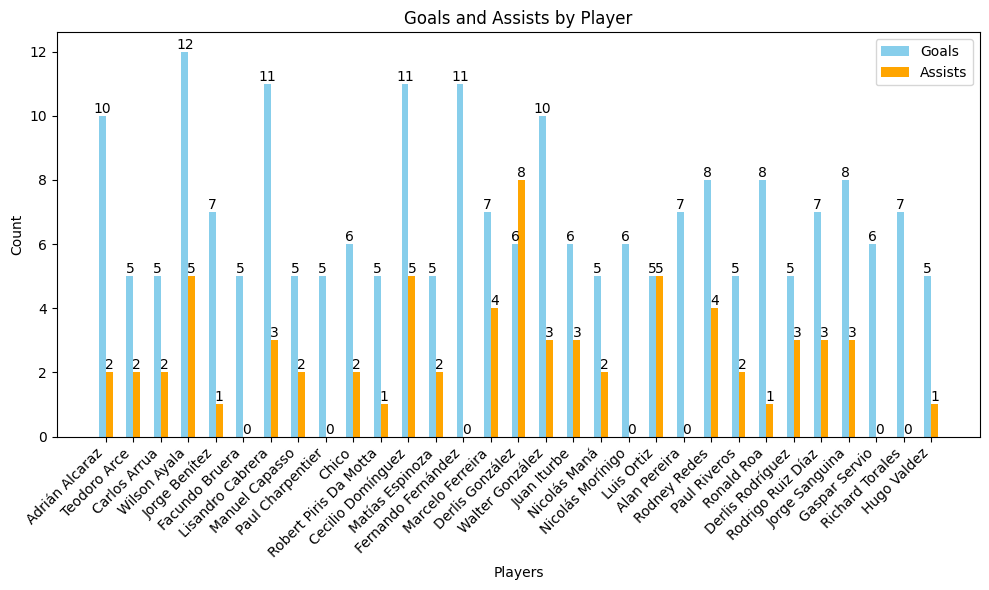

In [7]:
# Bar chart parameters
x = np.arange(len(df_filter_goals['player']))  # X-axis positions
width = 0.25  # Bar width

# Create the bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, df_filter_goals['goals'], width, label='Goals', color='skyblue')
bars2 = ax.bar(x + width/2, df_filter_goals['ast'], width, label='Assists', color='orange')

# Add labels, title, and legend
ax.set_xlabel('Players')
ax.set_ylabel('Count')
ax.set_title('Goals and Assists by Player')
ax.set_xticks(x)
ax.set_xticklabels(df_filter_goals['player'])
ax.legend()

# Display values on top of bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height, f'{int(height)}',
                ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)

plt.xticks(rotation=45, ha='right')

# Show the chart
plt.tight_layout()
plt.show()


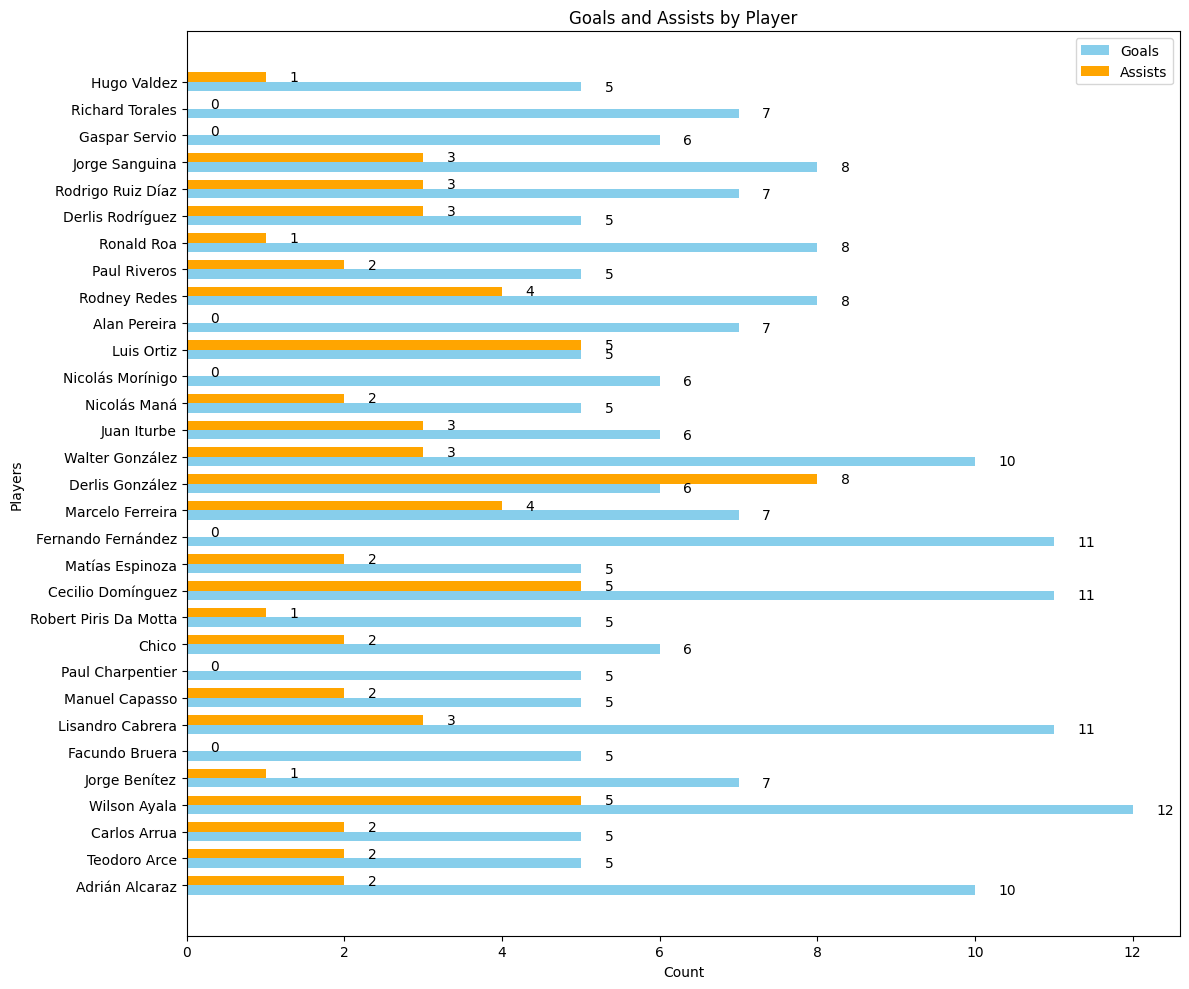

In [82]:
# Bar chart parameters
y = np.arange(len(df_filter_goals['player']))  # Y-axis positions
width = 0.35  # Bar width

# Create the horizontal bar chart
fig, ax = plt.subplots(figsize=(12, 10))
bars1 = ax.barh(y - width/2, df_filter_goals['goals'], width, label='Goals', color='skyblue')
bars2 = ax.barh(y + width/2, df_filter_goals['ast'], width, label='Assists', color='orange')

# Add labels, title, and legend
ax.set_xlabel('Count')
ax.set_ylabel('Players')
ax.set_title('Goals and Assists by Player')
ax.set_yticks(y)
ax.set_yticklabels(df_filter_goals['player'])
ax.legend()

# Display values on top of bars
def add_labels(bars):
    for bar in bars:
        width = bar.get_width()
        ax.text(width + 0.3, bar.get_y() + bar.get_height()/2, f'{int(width)}',
                ha='left', va='center')

add_labels(bars1)
add_labels(bars2)

# Adjust layout for better fit
plt.tight_layout()
plt.show()


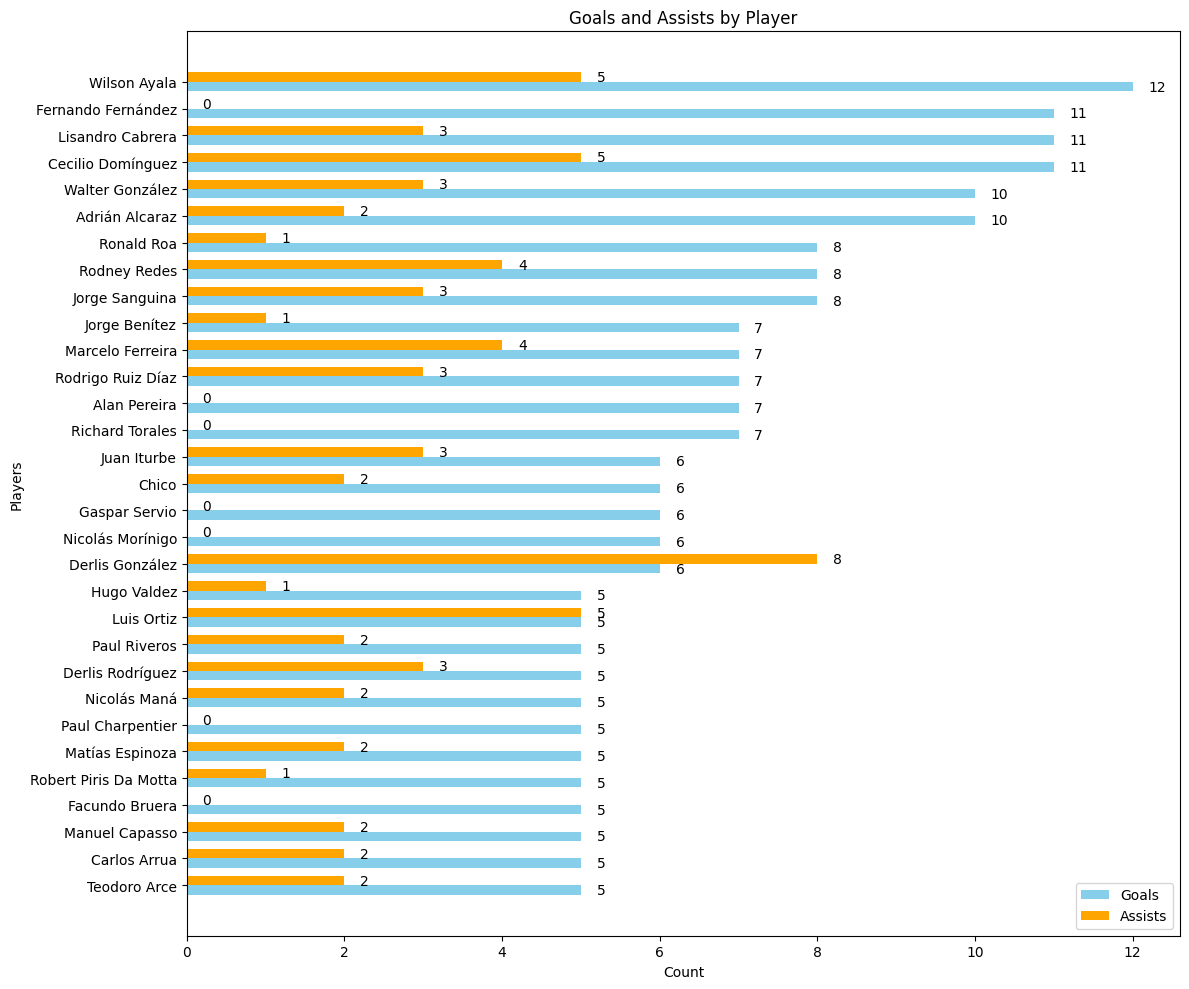

In [96]:
# Sort by goals (optional)
df = df_filter_goals.sort_values(by='goals', ascending=True)

# Bar chart parameters
y = np.arange(len(df['player']))  # Y-axis positions
width = 0.35  # Bar width

# Create the horizontal bar chart
fig, ax = plt.subplots(figsize=(12, 10))
bars1 = ax.barh(y - width/2, df['goals'], width, label='Goals', color='skyblue')
bars2 = ax.barh(y + width/2, df['ast'], width, label='Assists', color='orange')

# Add labels, title, and legend
ax.set_xlabel('Count')
ax.set_ylabel('Players')
ax.set_title('Goals and Assists by Player')
ax.set_yticks(y)
ax.set_yticklabels(df['player'])
ax.legend()

# Display values on top of bars
def add_labels(bars):
    for bar in bars:
        width = bar.get_width()
        ax.text(width + 0.2, bar.get_y() + bar.get_height()/2, f'{int(width)}',
                ha='left', va='center')

add_labels(bars1)
add_labels(bars2)

# Adjust layout for better fit
plt.tight_layout()
plt.show()

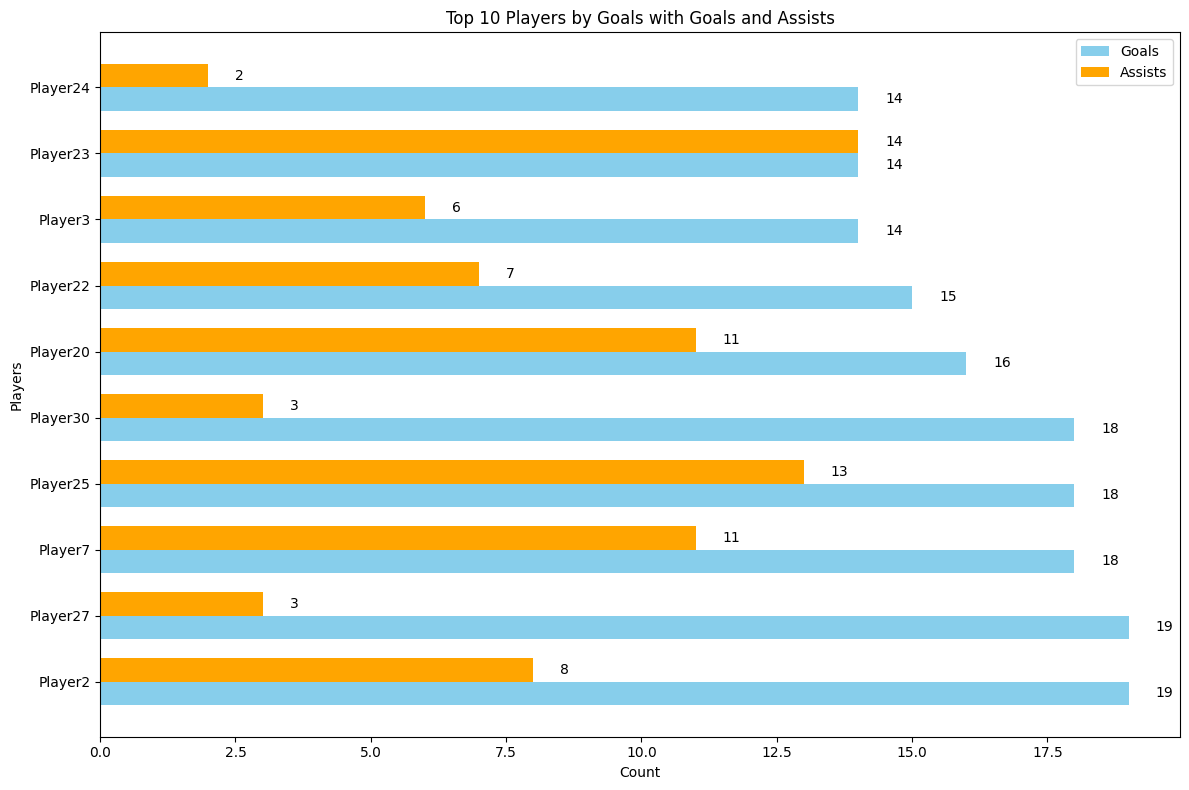

In [97]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Example DataFrame with 31 players
np.random.seed(42)
data = {
    'names': [f'Player{i+1}' for i in range(31)],
    'goals': np.random.randint(0, 20, 31),
    'assists': np.random.randint(0, 15, 31)
}
df = pd.DataFrame(data)

# Filter the top 10 players with the most goals
df_top10 = df.nlargest(10, 'goals')

# Bar chart parameters
y = np.arange(len(df_top10['names']))  # Y-axis positions
width = 0.35  # Bar width

# Create the horizontal bar chart
fig, ax = plt.subplots(figsize=(12, 8))
bars1 = ax.barh(y - width/2, df_top10['goals'], width, label='Goals', color='skyblue')
bars2 = ax.barh(y + width/2, df_top10['assists'], width, label='Assists', color='orange')

# Add labels, title, and legend
ax.set_xlabel('Count')
ax.set_ylabel('Players')
ax.set_title('Top 10 Players by Goals with Goals and Assists')
ax.set_yticks(y)
ax.set_yticklabels(df_top10['names'])
ax.legend()

# Display values next to bars
def add_labels(bars):
    for bar in bars:
        width = bar.get_width()
        ax.text(width + 0.5, bar.get_y() + bar.get_height()/2, f'{int(width)}',
                ha='left', va='center')

add_labels(bars1)
add_labels(bars2)

# Adjust layout for better fit
plt.tight_layout()
plt.show()


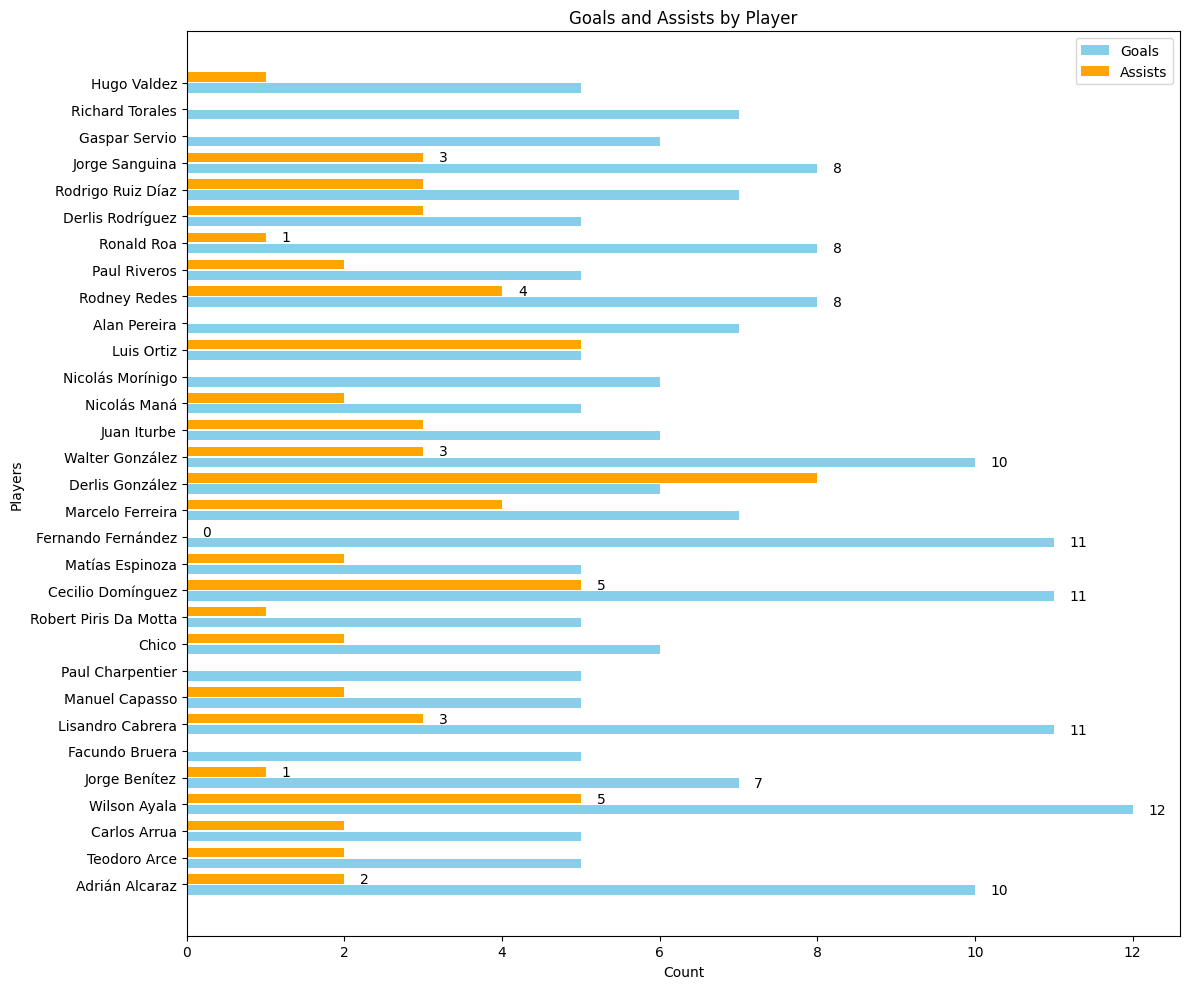

In [56]:
# Identify the top 10 players with the most goals
top10_players = df_filter_goals.nlargest(10, 'goals')['player'].tolist()

# Bar chart parameters
y = np.arange(len(df_filter_goals['player']))  # Y-axis positions
width = 0.35  # Bar width

# Create the horizontal bar chart
fig, ax = plt.subplots(figsize=(12, 10))
offset = 0.03
bars1 = ax.barh(y - (width/2 + offset), df_filter_goals['goals'], width, label='Goals', color='skyblue')
bars2 = ax.barh(y + (width/2 + offset), df_filter_goals['ast'], width, label='Assists', color='orange')

# Add labels, title, and legend
ax.set_xlabel('Count')
ax.set_ylabel('Players')
ax.set_title('Goals and Assists by Player')
ax.set_yticks(y)
ax.set_yticklabels(df_filter_goals['player'])
ax.legend()

# Display values only for top 10 players
def add_labels(bars, metric):
    for bar, name in zip(bars, df_filter_goals['player']):
        if name in top10_players:  # Add values only for top 10 players
            value = int(bar.get_width())
            ax.text(value + 0.2, bar.get_y() + bar.get_height()/2, f'{value}',
                    ha='left', va='center')

add_labels(bars1, 'goals')
add_labels(bars2, 'assists')

# Adjust layout for better fit
plt.tight_layout()
plt.show()


Claude

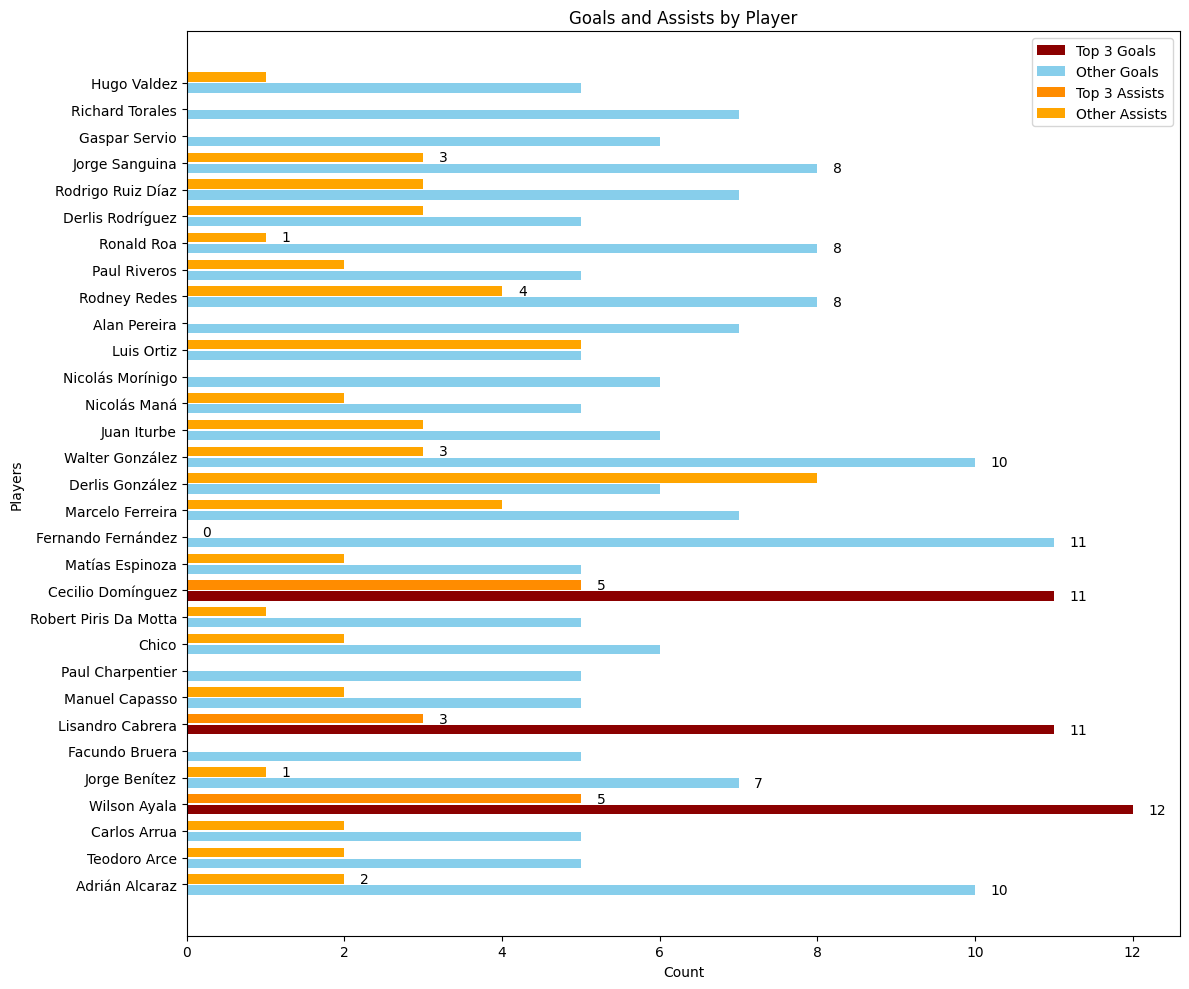

In [61]:
# Identify the top 10 and top 3 players with the most goals
top10_players = df_filter_goals.nlargest(10, 'goals')['player'].tolist()
top3_players = df_filter_goals.nlargest(3, 'goals')['player'].tolist()

# Bar chart parameters
y = np.arange(len(df_filter_goals['player']))  # Y-axis positions
width = 0.35  # Bar width

# Create the horizontal bar chart
fig, ax = plt.subplots(figsize=(12, 10))
offset = 0.03

# Create color lists for goals and assists
goals_colors = ['darkred' if player in top3_players else 'skyblue' for player in df_filter_goals['player']]
assists_colors = ['darkorange' if player in top3_players else 'orange' for player in df_filter_goals['player']]

# Create bars with different colors
bars1 = ax.barh(y - (width/2 + offset), df_filter_goals['goals'], width, label='Goals', color=goals_colors)
bars2 = ax.barh(y + (width/2 + offset), df_filter_goals['ast'], width, label='Assists', color=assists_colors)

# Add labels, title, and legend
ax.set_xlabel('Count')
ax.set_ylabel('Players')
ax.set_title('Goals and Assists by Player')
ax.set_yticks(y)
ax.set_yticklabels(df_filter_goals['player'])

# Create custom legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='darkred', label='Top 3 Goals'),
    Patch(facecolor='skyblue', label='Other Goals'),
    Patch(facecolor='darkorange', label='Top 3 Assists'),
    Patch(facecolor='orange', label='Other Assists')
]
ax.legend(handles=legend_elements)

# Display values only for top 10 players
def add_labels(bars, metric):
    for bar, name in zip(bars, df_filter_goals['player']):
        if name in top10_players:  # Add values only for top 10 players
            value = int(bar.get_width())
            ax.text(value + 0.2, bar.get_y() + bar.get_height()/2, f'{value}',
                    ha='left', va='center')

add_labels(bars1, 'goals')
add_labels(bars2, 'assists')

# Adjust layout for better fit
plt.tight_layout()
plt.show()

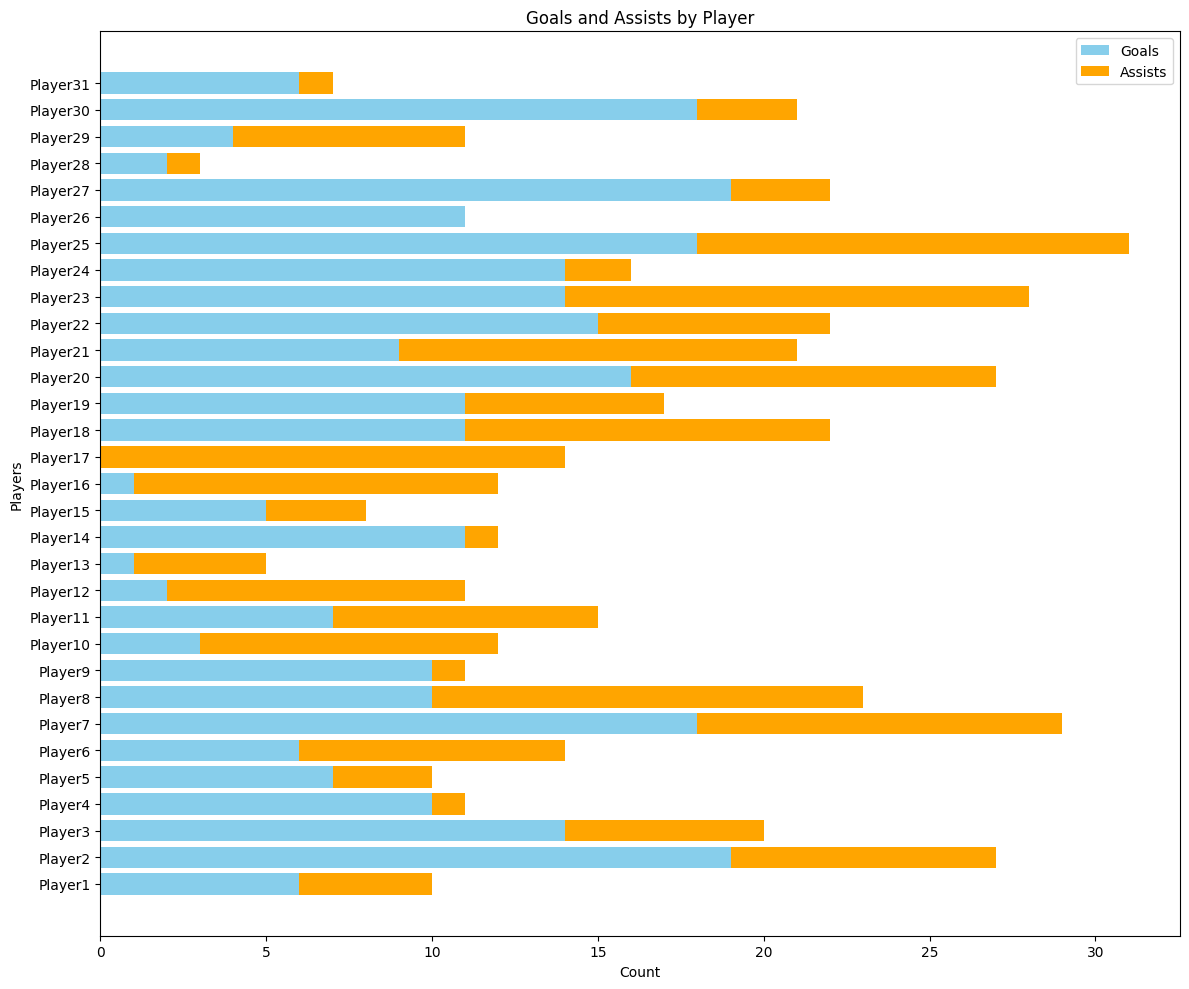

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Example DataFrame with 31 players
np.random.seed(42)
data = {
    'names': [f'Player{i+1}' for i in range(31)],
    'goals': np.random.randint(0, 20, 31),
    'assists': np.random.randint(0, 15, 31)
}
df = pd.DataFrame(data)

# Identify the top 10 players with the most goals
top10_players = df.nlargest(10, 'goals')['names']

# Bar chart parameters
y = np.arange(len(df['names']))  # Y-axis positions

# Create the horizontal stacked bar chart
fig, ax = plt.subplots(figsize=(12, 10))
bars1 = ax.barh(y, df['goals'], label='Goals', color='skyblue')
bars2 = ax.barh(y, df['assists'], left=df['goals'], label='Assists', color='orange')

# Add labels, title, and legend
ax.set_xlabel('Count')
ax.set_ylabel('Players')
ax.set_title('Goals and Assists by Player')
ax.set_yticks(y)
ax.set_yticklabels(df['names'])
ax.legend()

# Display values only for top 10 players
def add_labels():
    for bar1, bar2, name in zip(bars1, bars2, df['names']):
        if name in top10_players:
            # Get positions and values
            goals = int(bar1.get_width())
            assists = int(bar2.get_width())
            total = goals + assists
            # Display total on the bar
            ax.text(total + 0.5, bar1.get_y() + bar1.get_height()/2, f'{total}',
                    ha='left', va='center', fontsize=10)

add_labels()

# Adjust layout for better fit
plt.tight_layout()
plt.show()


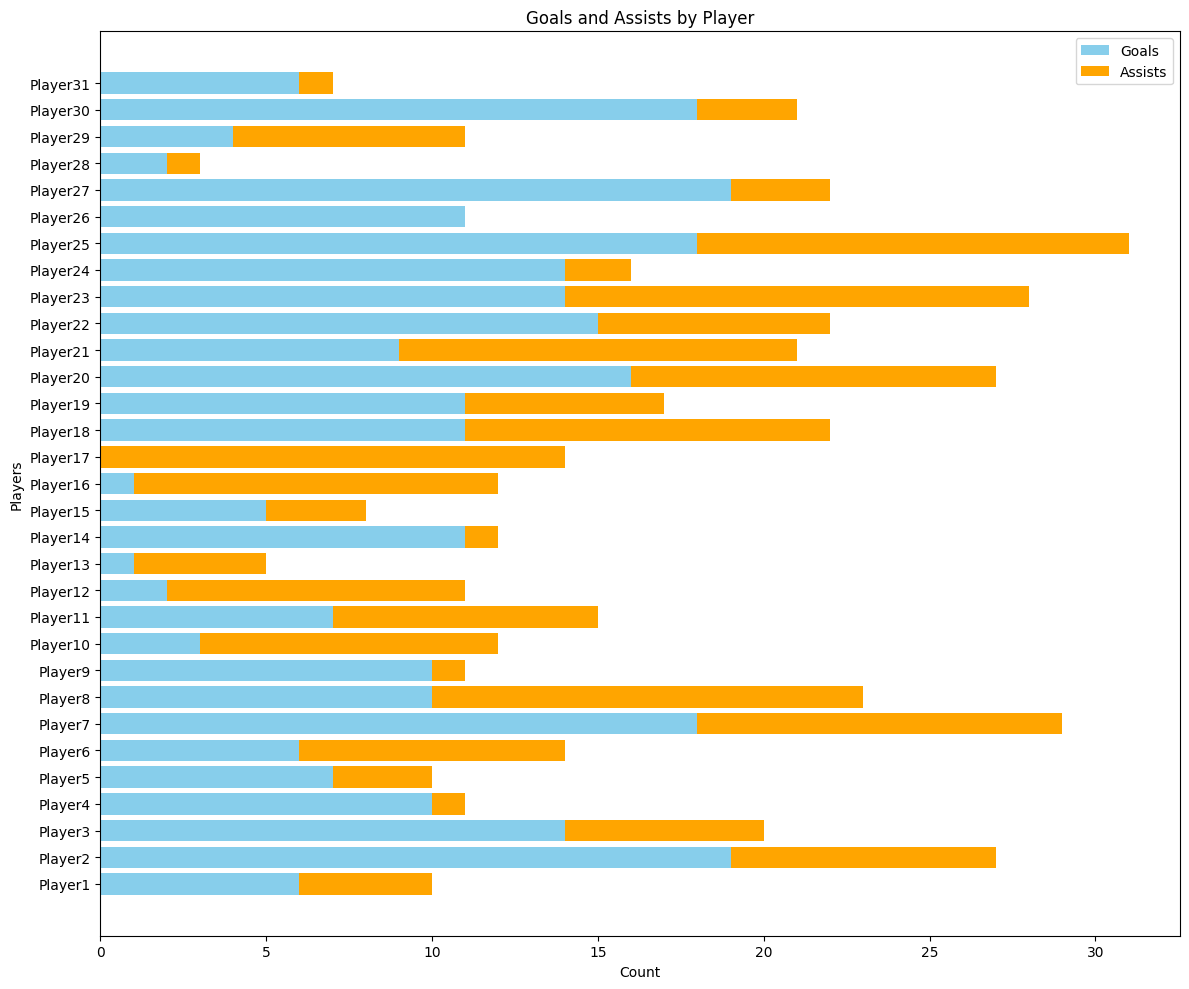

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Example DataFrame with 31 players
np.random.seed(42)
data = {
    'names': [f'Player{i+1}' for i in range(31)],
    'goals': np.random.randint(0, 20, 31),
    'assists': np.random.randint(0, 15, 31)
}
df = pd.DataFrame(data)

# Identify the top 10 players with the most goals
top10_players = df.nlargest(10, 'goals')['names']

# Bar chart parameters
y = np.arange(len(df['names']))  # Y-axis positions

# Create the horizontal stacked bar chart
fig, ax = plt.subplots(figsize=(12, 10))
bars1 = ax.barh(y, df['goals'], label='Goals', color='skyblue')
bars2 = ax.barh(y, df['assists'], left=df['goals'], label='Assists', color='orange')

# Add labels, title, and legend
ax.set_xlabel('Count')
ax.set_ylabel('Players')
ax.set_title('Goals and Assists by Player')
ax.set_yticks(y)
ax.set_yticklabels(df['names'])
ax.legend()

# Display values for goals and assists for top 10 players
def add_labels():
    for bar1, bar2, name in zip(bars1, bars2, df['names']):
        if name in top10_players:
            # Annotate goals
            goals = int(bar1.get_width())
            ax.text(goals / 2, bar1.get_y() + bar1.get_height() / 2, f'{goals}',
                    ha='center', va='center', color='black', fontsize=10)

            # Annotate assists
            assists = int(bar2.get_width())
            ax.text(goals + assists / 2, bar2.get_y() + bar2.get_height() / 2, f'{assists}',
                    ha='center', va='center', color='black', fontsize=10)

add_labels()

# Adjust layout for better fit
plt.tight_layout()
plt.show()


Text(0, 0.5, 'ast')

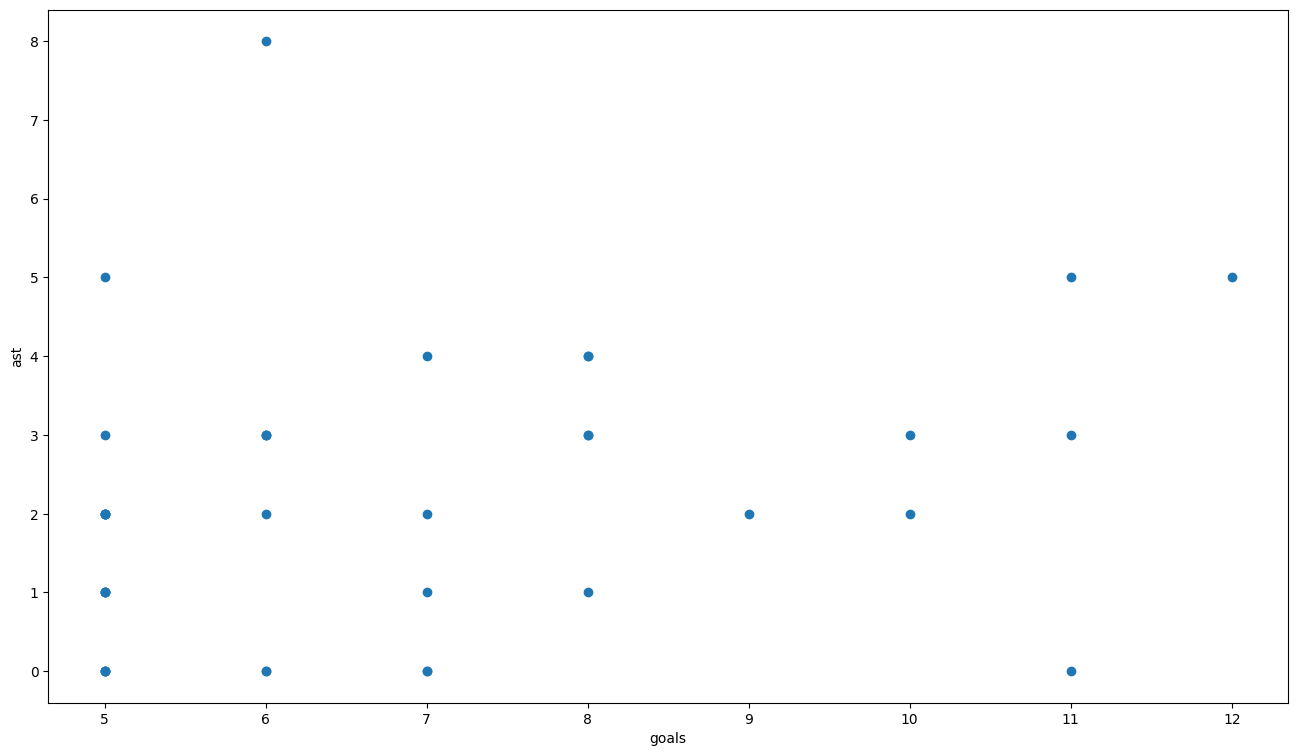

In [33]:
fig, ax = plt.subplots(figsize = (16,9))
ejex = 'goals'
ejey = 'ast'
ax.scatter(ejex, ejey, data = df_filter_goals)
ax.set_xlabel(ejex)
ax.set_ylabel(ejey)

# df_liga_par['goals'] = df_liga_par.goa

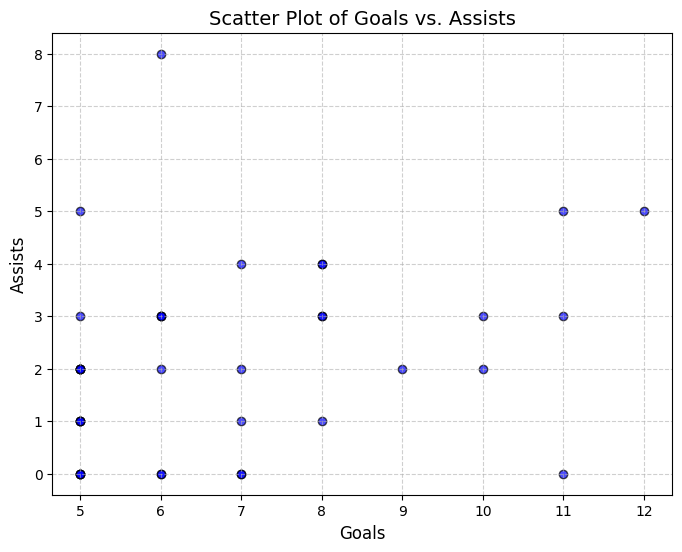

In [34]:
# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df_filter_goals['goals'], df_filter_goals['ast'], color='blue', alpha=0.7, edgecolors='black')

# Add labels and title
plt.xlabel("Goals", fontsize=12)
plt.ylabel("Assists", fontsize=12)
plt.title("Scatter Plot of Goals vs. Assists", fontsize=14)

# Customize grid
plt.grid(True, linestyle='--', alpha=0.6)

# Show plot
plt.show()

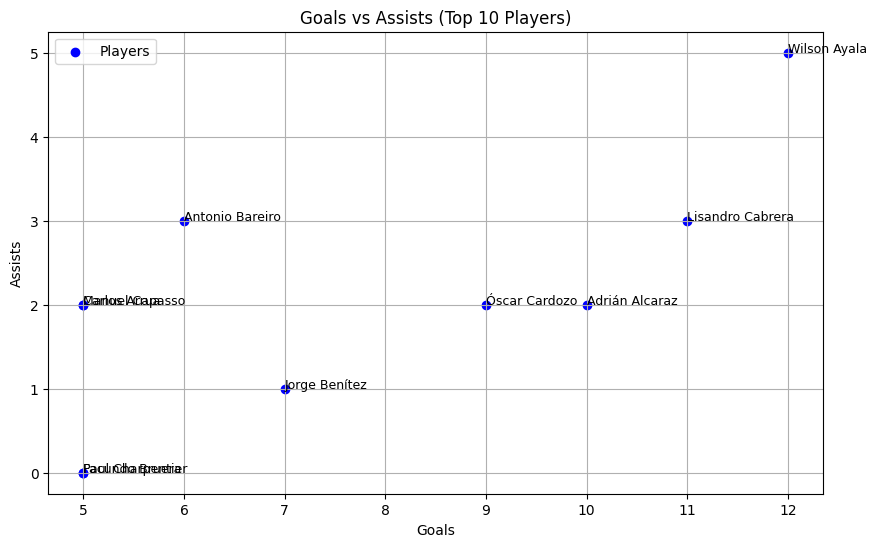

In [36]:
# Filter the first 10 rows
df_top10 = df_filter_goals.head(10)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_top10['goals'], df_top10['ast'], color='blue', label='Players')

# Annotate each point with the player's name
for i, player in enumerate(df_top10['player']):
    plt.text(df_top10['goals'].iloc[i], df_top10['ast'].iloc[i], player, fontsize=9)

# Add labels and title
plt.xlabel('Goals')
plt.ylabel('Assists')
plt.title('Goals vs Assists (Top 10 Players)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [1]:
import matplotlib.pyplot as plt

# Create a scatter plot for all records
plt.figure(figsize=(10, 6))
plt.scatter(df_filter_goals['ast'], df_filter_goals['goals'], color='blue', label='Players')

# Annotate only the first 10 points with the player's name
df_top10 = df_filter_goals.head(10)
for i, player in enumerate(df_top10['player']):
    plt.text(df_top10['goals'].iloc[i], df_top10['ast'].iloc[i], player, fontsize=9)

# Add labels and title
plt.xlabel('Goals')
plt.ylabel('Assists')
plt.title('Goals vs Assists (All Players, Names for Top 10)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


NameError: name 'df_filter_goals' is not defined

<Figure size 1000x600 with 0 Axes>

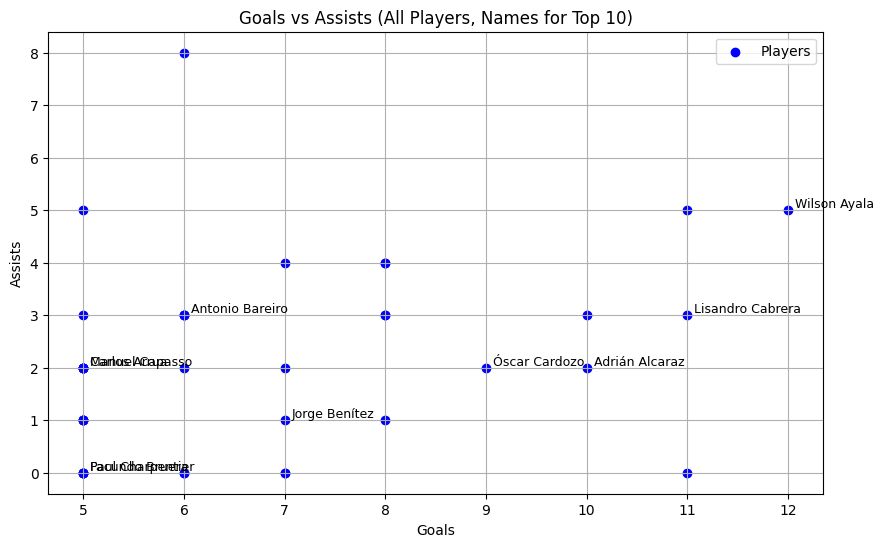

In [42]:
import matplotlib.pyplot as plt

# Create a scatter plot for all records
plt.figure(figsize=(10, 6))
plt.scatter(df_filter_goals['goals'], df_filter_goals['ast'], color='blue', label='Players')

# Annotate only the first 10 points with the player's name
df_top10 = df_filter_goals.head(10)
for i, player in enumerate(df_top10['player']):
    # Offset the text slightly for better visibility
    # plt.text(df_top10['goals'].iloc[i] + 0.2, df_top10['ast'].iloc[i] + 0.2,
    #          player, fontsize=9)

    x_offset = (df_top10['goals'].max() - df_top10['goals'].min()) * 0.01
    y_offset = (df_top10['ast'].max() - df_top10['ast'].min()) * 0.01
    plt.text(df_top10['goals'].iloc[i] + x_offset, df_top10['ast'].iloc[i] + y_offset,
         player, fontsize=9)

# Add labels and title
plt.xlabel('Goals')
plt.ylabel('Assists')
plt.title('Goals vs Assists (All Players, Names for Top 10)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()
